# Home Credit Default Risk Project

## Import libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.metrics import auc, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Import data and understanding

In [3]:
ap_test = pd.read_csv('application_test.csv')

In [4]:
ap_test.shape

(48744, 121)

In [5]:
ap_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB


In [6]:
ap_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
ap_test.tail()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
48743,456250,Cash loans,F,Y,N,0,135000.0,312768.0,24709.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0


In [8]:
ap_train = pd.read_csv('application_train.csv')

In [9]:
ap_train.shape

(307511, 122)

In [10]:
ap_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [11]:
ap_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
ap_train.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0


In [13]:
ap_train.describe().columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=106)

In [14]:
ap_train.describe(include = 'O').columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [15]:
bureau_balance = pd.read_csv('bureau_balance.csv')

In [16]:
bureau_balance.shape

(27299925, 3)

In [17]:
bureau_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


In [18]:
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [19]:
bureau_balance.tail()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
27299920,5041336,-47,X
27299921,5041336,-48,X
27299922,5041336,-49,X
27299923,5041336,-50,X
27299924,5041336,-51,X


In [20]:
bureau = pd.read_csv('bureau.csv')

In [21]:
bureau.shape

(1716428, 17)

In [22]:
bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [23]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [24]:
bureau.tail()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
1716423,259355,5057750,Active,currency 1,-44,0,-30.0,NaN,0.0,0,11250.00,11250.0,0.0,0.0,Microloan,-19,NaN
1716424,100044,5057754,Closed,currency 1,-2648,0,-2433.0,-2493.0,5476.5,0,38130.84,0.0,0.0,0.0,Consumer credit,-2493,NaN
1716425,100044,5057762,Closed,currency 1,-1809,0,-1628.0,-970.0,NaN,0,15570.00,NaN,NaN,0.0,Consumer credit,-967,NaN
1716426,246829,5057770,Closed,currency 1,-1878,0,-1513.0,-1513.0,NaN,0,36000.00,0.0,0.0,0.0,Consumer credit,-1508,NaN
1716427,246829,5057778,Closed,currency 1,-463,0,NaN,-387.0,NaN,0,22500.00,0.0,NaN,0.0,Microloan,-387,NaN


In [25]:
credit_card_balance = pd.read_csv('credit_card_balance.csv')

In [26]:
credit_card_balance.shape

(3840312, 23)

In [27]:
credit_card_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

In [28]:
credit_card_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [29]:
credit_card_balance.tail()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
3840307,1036507,328243,-9,0.000,45000,NaN,0.0,NaN,NaN,0.0,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
3840308,1714892,347207,-9,0.000,45000,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0,0.0,0.0,23.0,Active,0,0
3840309,1302323,215757,-9,275784.975,585000,270000.0,270000.0,0.0,0.0,2250.0,...,273093.975,273093.975,2.0,2,0.0,0.0,18.0,Active,0,0
3840310,1624872,430337,-10,0.000,450000,NaN,0.0,NaN,NaN,0.0,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
3840311,2411345,236760,-10,0.000,157500,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0,0.0,0.0,21.0,Completed,0,0


In [30]:
installments_payments = pd.read_csv('installments_payments.csv')

In [31]:
installments_payments.shape

(13605401, 8)

In [32]:
installments_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


In [33]:
installments_payments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [34]:
installments_payments.tail()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
13605396,2186857,428057,0.0,66,-1624.0,NaN,67.500,NaN
13605397,1310347,414406,0.0,47,-1539.0,NaN,67.500,NaN
13605398,1308766,402199,0.0,43,-7.0,NaN,43737.435,NaN
13605399,1062206,409297,0.0,43,-1986.0,NaN,67.500,NaN
13605400,2448869,434321,1.0,19,-27.0,NaN,11504.250,NaN


In [35]:
POS_CASH_balance = pd.read_csv('POS_CASH_balance.csv')

In [36]:
POS_CASH_balance.shape

(10001358, 8)

In [37]:
POS_CASH_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


In [38]:
POS_CASH_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [39]:
POS_CASH_balance.tail()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
10001353,2448283,226558,-20,6.0,0.0,Active,843,0
10001354,1717234,141565,-19,12.0,0.0,Active,602,0
10001355,1283126,315695,-21,10.0,0.0,Active,609,0
10001356,1082516,450255,-22,12.0,0.0,Active,614,0
10001357,1259607,174278,-52,16.0,0.0,Completed,0,0


In [40]:
previous_application = pd.read_csv('previous_application.csv')

In [41]:
previous_application.shape

(1670214, 37)

In [42]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [43]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
previous_application.tail()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0
1670213,2418762,261212,Cash loans,16431.300,360000.0,360000.0,NaN,360000.0,SUNDAY,10,...,XNA,48.0,middle,Cash X-Sell: middle,365243.0,-1163.0,247.0,-443.0,-423.0,0.0


In [45]:
sample_submission = pd.read_csv('sample_submission.csv')

In [46]:
sample_submission.head()

,SK_ID_CURR,TARGET
0,100001,0.5
1,100005,0.5
2,100013,0.5
3,100028,0.5
4,100038,0.5


In [47]:
sample_submission.tail()

,SK_ID_CURR,TARGET
48739,456221,0.5
48740,456222,0.5
48741,456223,0.5
48742,456224,0.5
48743,456250,0.5


# EDA

## General understanding of Data

### 1. bureau_balance

In [48]:
bureau_balance.describe(percentiles = [.01, .1, .25, .5, .75, .9, .99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
SK_ID_BUREAU,27299925.0,6.036297e+06,492348.856904,5001709.0,5011999.0,5262433.0,5730933.0,6070821.0,6431951.0,6664950.0,6828171.0,6842888.0
MONTHS_BALANCE,27299925.0,-3.074169e+01,23.864509,-96.0,-91.0,-68.0,-46.0,-25.0,-11.0,-4.0,0.0,0.0


In [49]:
bureau_balance.describe(include ='O')

,STATUS
count,27299925
unique,8
top,C
freq,13646993


<AxesSubplot:xlabel='MONTHS_BALANCE', ylabel='Count'>

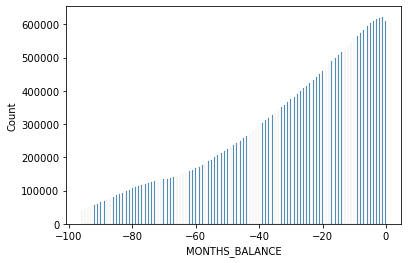

In [50]:
# Vislualize distribution of numeric data
sns.histplot(data=bureau_balance['MONTHS_BALANCE'])

<AxesSubplot:xlabel='STATUS', ylabel='count'>

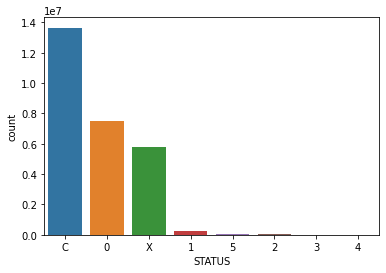

In [51]:
# Vislualize distribution of categorical data
sns.countplot(x='STATUS', data=bureau_balance, order=bureau_balance['STATUS'].value_counts().index)

We can see the meaning of status in 'HomeCredit_columns_description':
- C means closed, 
- X means status unknown, 
- 0 means no DPD, 
- 1 means maximal did during month between 1-30, 
- 2 means DPD 31-60,… 
- 5 means DPD 120+ or sold or written off ]

=> We have some conclusion base on the visualization
+ Status 'Closed' is the most populative
+ The status 'unknow' is quite large
+ The status of bad debt group 1-5 is small

### 2. bureau

In [52]:
bureau.describe([.01, .1, .25, .5, .75, .9, .99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
SK_ID_CURR,1716428.0,2.782149e+05,1.029386e+05,100001.000,103618.00,135602.0,188866.75,278055.0,367426.00,420964.000,4.527440e+05,4.562550e+05
SK_ID_BUREAU,1716428.0,5.924434e+06,5.322657e+05,5000000.000,5018307.27,5184874.7,5463953.75,5926303.5,6385681.25,6660630.300,6.825134e+06,6.843457e+06
DAYS_CREDIT,1716428.0,-1.142108e+03,7.951649e+02,-2922.000,-2867.00,-2443.0,-1666.00,-987.0,-474.00,-215.000,-3.800000e+01,0.000000e+00
CREDIT_DAY_OVERDUE,1716428.0,8.181666e-01,3.654443e+01,0.000,0.00,0.0,0.00,0.0,0.00,0.000,0.000000e+00,2.792000e+03
DAYS_CREDIT_ENDDATE,1610875.0,5.105174e+02,4.994220e+03,-42060.000,-2571.00,-1922.0,-1138.00,-330.0,474.00,1334.000,3.102900e+04,3.119900e+04
DAYS_ENDDATE_FACT,1082775.0,-1.017437e+03,7.140106e+02,-42023.000,-2639.00,-2159.0,-1489.00,-897.0,-425.00,-178.000,-2.400000e+01,0.000000e+00
AMT_CREDIT_MAX_OVERDUE,591940.0,3.825418e+03,2.060316e+05,0.000,0.00,0.0,0.00,0.0,0.00,7594.875,4.198875e+04,1.159872e+08
CNT_CREDIT_PROLONG,1716428.0,6.410406e-03,9.622391e-02,0.000,0.00,0.0,0.00,0.0,0.00,0.000,0.000000e+00,9.000000e+00
AMT_CREDIT_SUM,1716415.0,3.549946e+05,1.149811e+06,0.000,0.00,22500.0,51300.00,125518.5,315000.00,778754.736,3.700916e+06,5.850000e+08
AMT_CREDIT_SUM_DEBT,1458759.0,1.370851e+05,6.774011e+05,-4705600.320,0.00,0.0,0.00,0.0,40153.50,295456.500,2.259728e+06,1.701000e+08


In [53]:
bureau.describe(include = 'O')

,CREDIT_ACTIVE,CREDIT_CURRENCY,CREDIT_TYPE
count,1716428,1716428,1716428
unique,4,4,15
top,Closed,currency 1,Consumer credit
freq,1079273,1715020,1251615


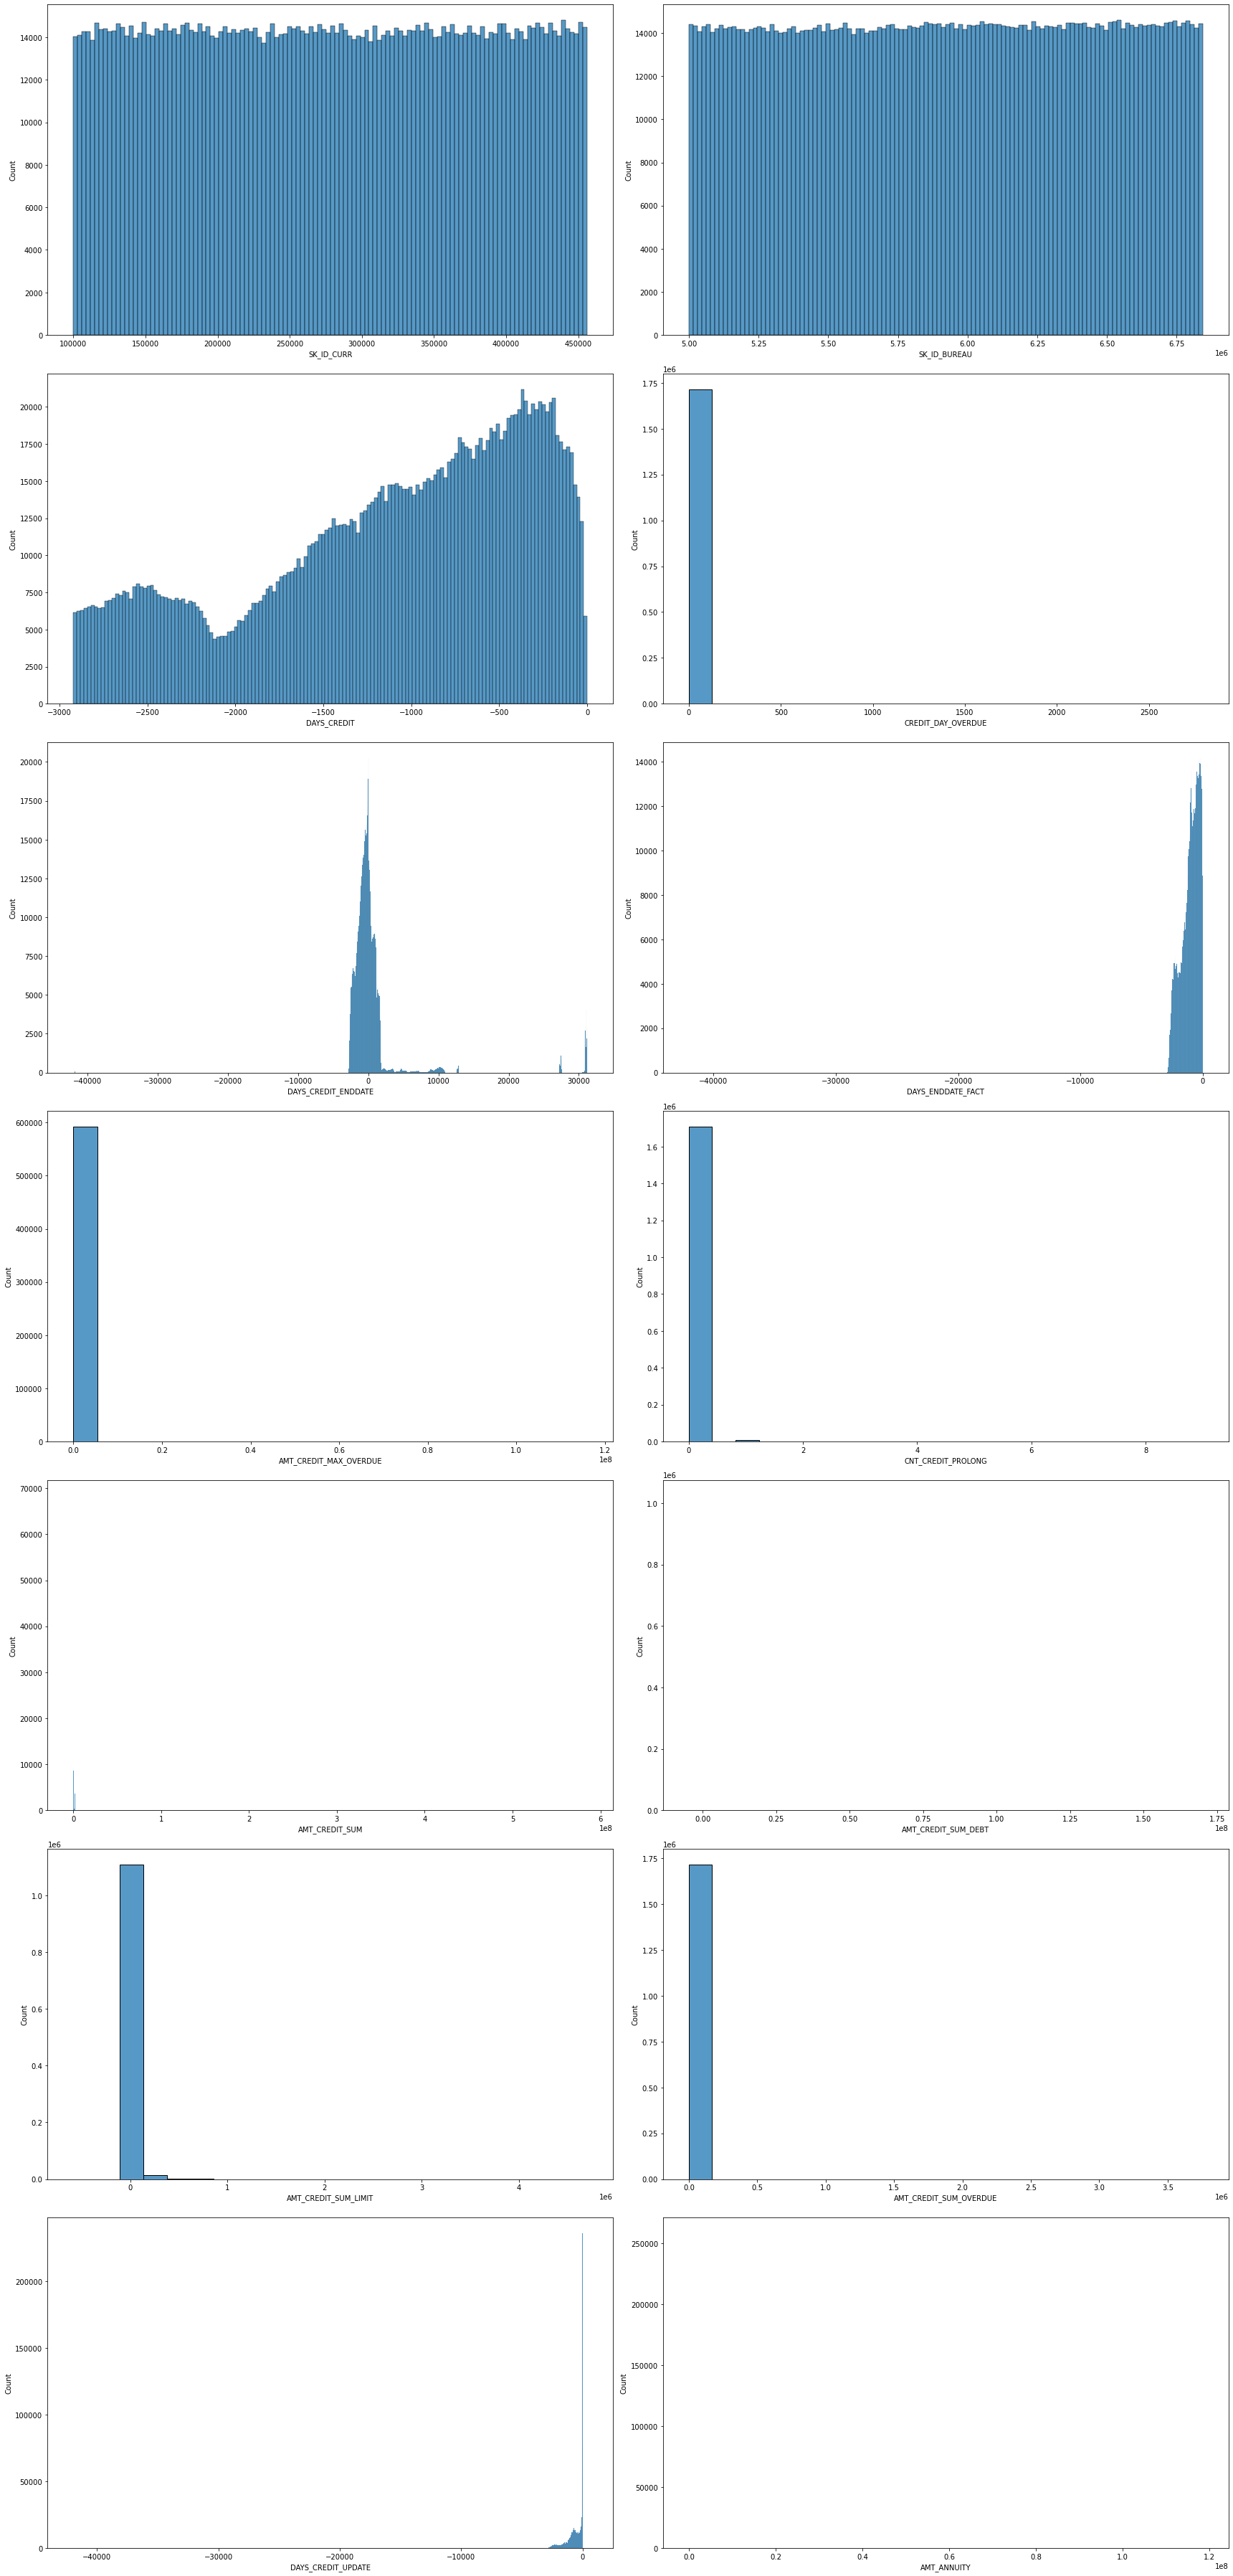

In [54]:
# Vislualize distribution of numeric data
bureau_number = bureau.describe().columns

fig,ax = plt.subplots(7,2, figsize=(24,50)) 
i=0 
for x in range(7):
    for y in range(2):
        sns.histplot(bureau[bureau_number[i]], ax = ax[x,y])
        i+=1
plt.tight_layout()
plt.show()

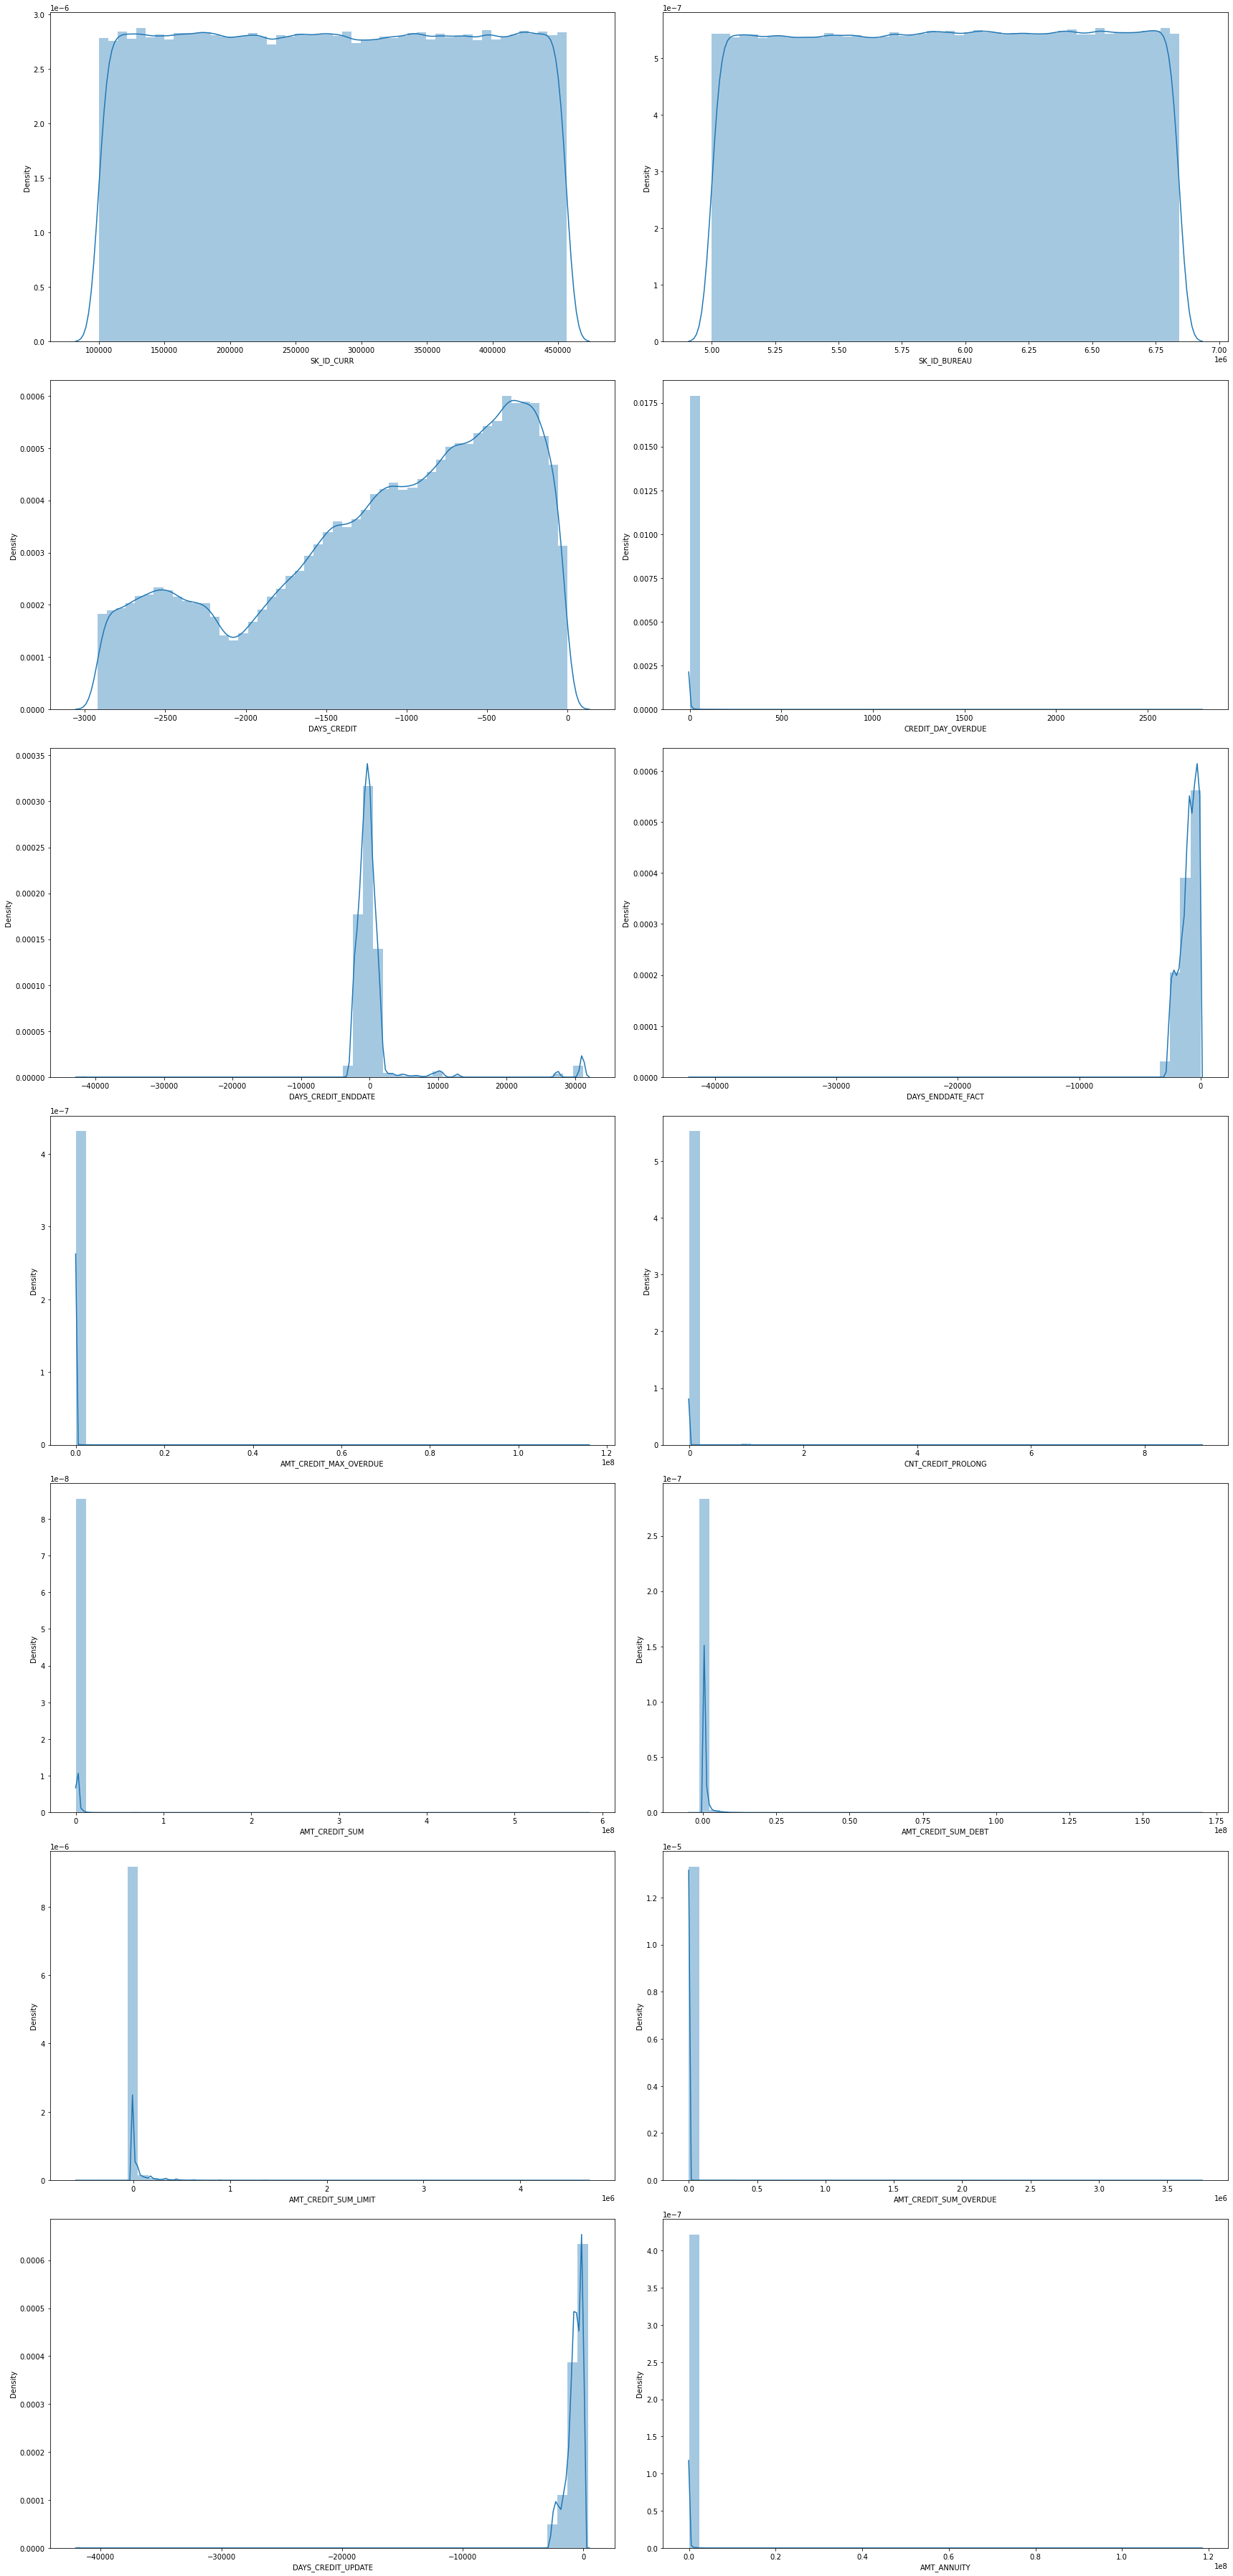

In [55]:
# Vislualize distribution of numeric data
bureau_number = bureau.describe().columns

fig,ax = plt.subplots(7,2, figsize=(24,50)) 
i=0 
for x in range(7):
    for y in range(2):
        sns.distplot(bureau[bureau_number[i]], ax = ax[x,y])
        i+=1
plt.tight_layout()
plt.show()

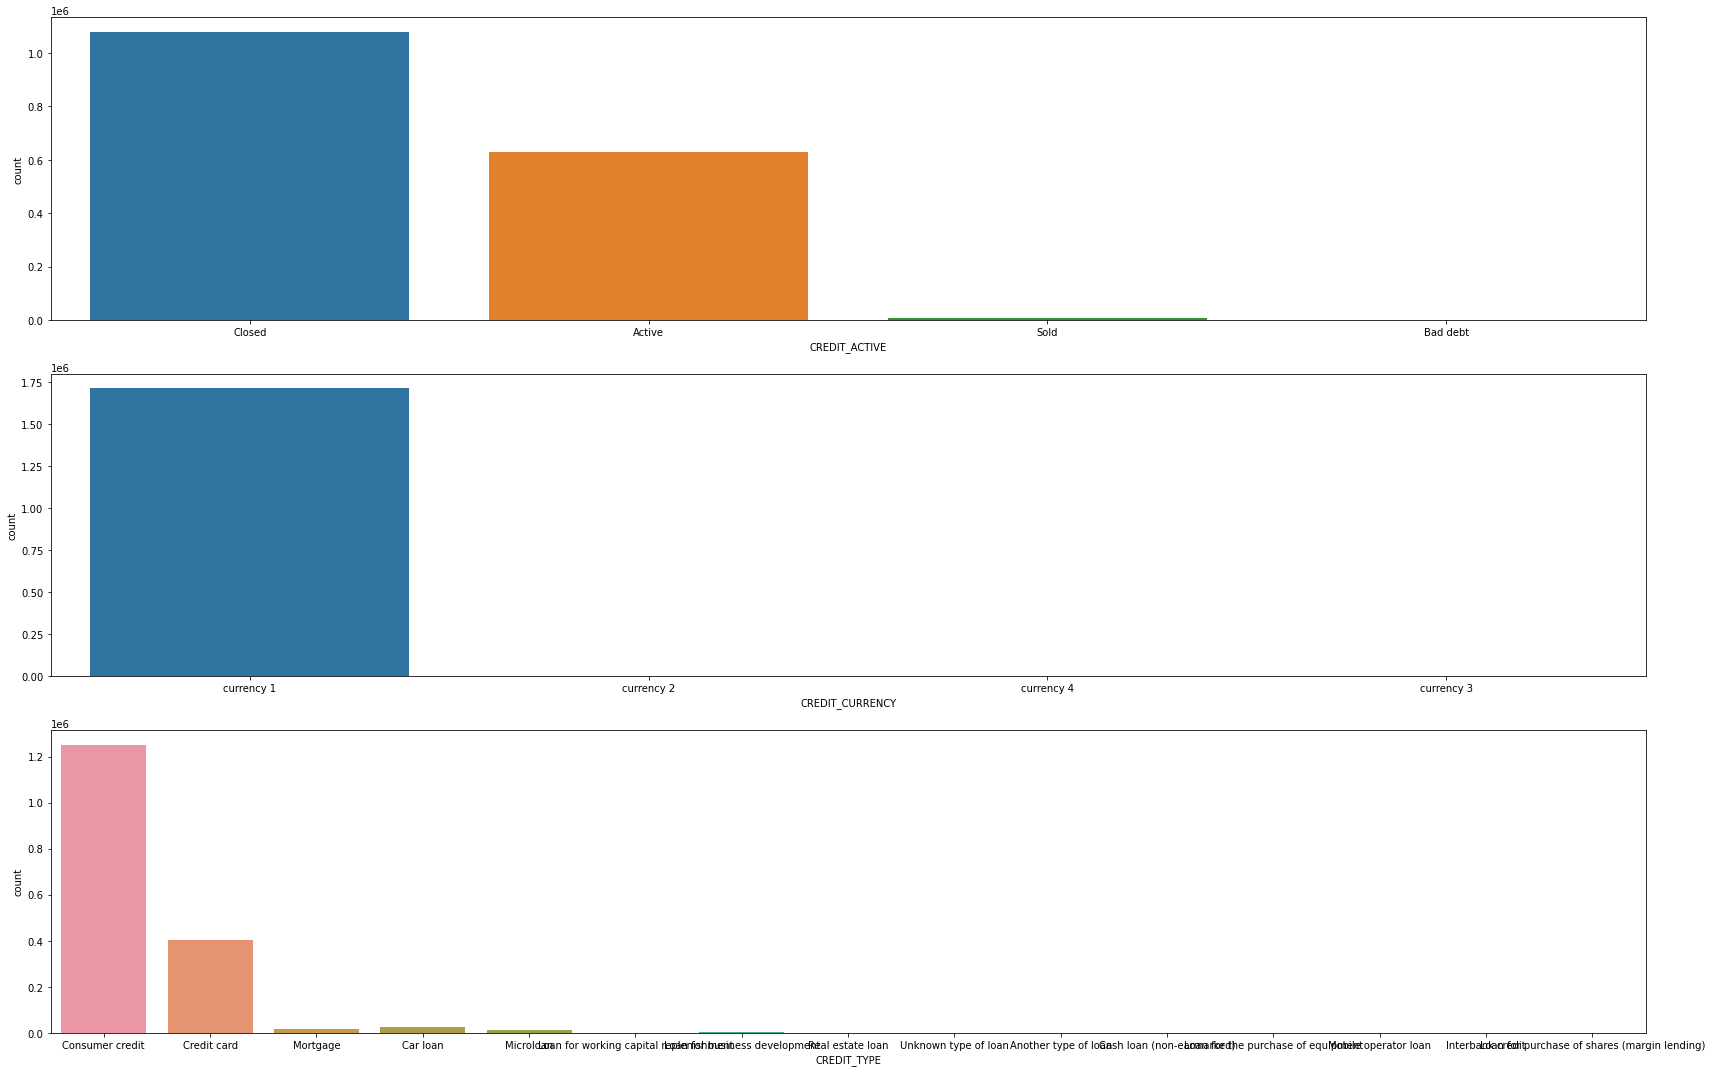

In [56]:
# Vislualize distribution of categorical data
bureau_cat = bureau.describe(include='O').columns

fig,ax = plt.subplots(3,1, figsize=(24,15)) 
i=0 
for x in range(3):
        sns.countplot(bureau[bureau_cat[i]], ax = ax[x])
        i+=1
plt.tight_layout()
plt.show()

### 3. credit_card_balance

In [57]:
credit_card_balance.describe([.01, .1, .25, .5, .75, .9, .99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
SK_ID_PREV,3840312.0,1.904504e+06,536469.470563,1000018.000,1010017.00,1176859.0,1434385.00,1897122.0,2.369328e+06,2.652010e+06,2.825323e+06,2843496.000
SK_ID_CURR,3840312.0,2.783242e+05,102704.475133,100006.000,103570.00,135912.0,189517.00,278396.0,3.675800e+05,4.214920e+05,4.527490e+05,456250.000
MONTHS_BALANCE,3840312.0,-3.452192e+01,26.667751,-96.000,-93.00,-76.0,-55.00,-28.0,-1.100000e+01,-5.000000e+00,-1.000000e+00,-1.000
AMT_BALANCE,3840312.0,5.830016e+04,106307.031025,-420250.185,0.00,0.0,0.00,0.0,8.904669e+04,1.800162e+05,4.662951e+05,1505902.185
AMT_CREDIT_LIMIT_ACTUAL,3840312.0,1.538080e+05,165145.699523,0.000,0.00,0.0,45000.00,112500.0,1.800000e+05,4.275000e+05,7.650000e+05,1350000.000
AMT_DRAWINGS_ATM_CURRENT,3090496.0,5.961325e+03,28225.688579,-6827.310,0.00,0.0,0.00,0.0,0.000000e+00,6.750000e+03,1.350000e+05,2115000.000
AMT_DRAWINGS_CURRENT,3840312.0,7.433388e+03,33846.077334,-6211.620,0.00,0.0,0.00,0.0,0.000000e+00,1.125000e+04,1.575000e+05,2287098.315
AMT_DRAWINGS_OTHER_CURRENT,3090496.0,2.881696e+02,8201.989345,0.000,0.00,0.0,0.00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1529847.000
AMT_DRAWINGS_POS_CURRENT,3090496.0,2.968805e+03,20796.887047,0.000,0.00,0.0,0.00,0.0,0.000000e+00,0.000000e+00,7.708061e+04,2239274.160
AMT_INST_MIN_REGULARITY,3535076.0,3.540204e+03,5600.154122,0.000,0.00,0.0,0.00,0.0,6.633911e+03,9.000000e+03,2.331280e+04,202882.005


In [58]:
credit_card_balance.describe(include = 'O')

,NAME_CONTRACT_STATUS
count,3840312
unique,7
top,Active
freq,3698436


In [59]:
credit_card_balance.describe().columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE',
       'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',
       'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',
       'CNT_INSTALMENT_MATURE_CUM', 'SK_DPD', 'SK_DPD_DEF'],
      dtype='object')

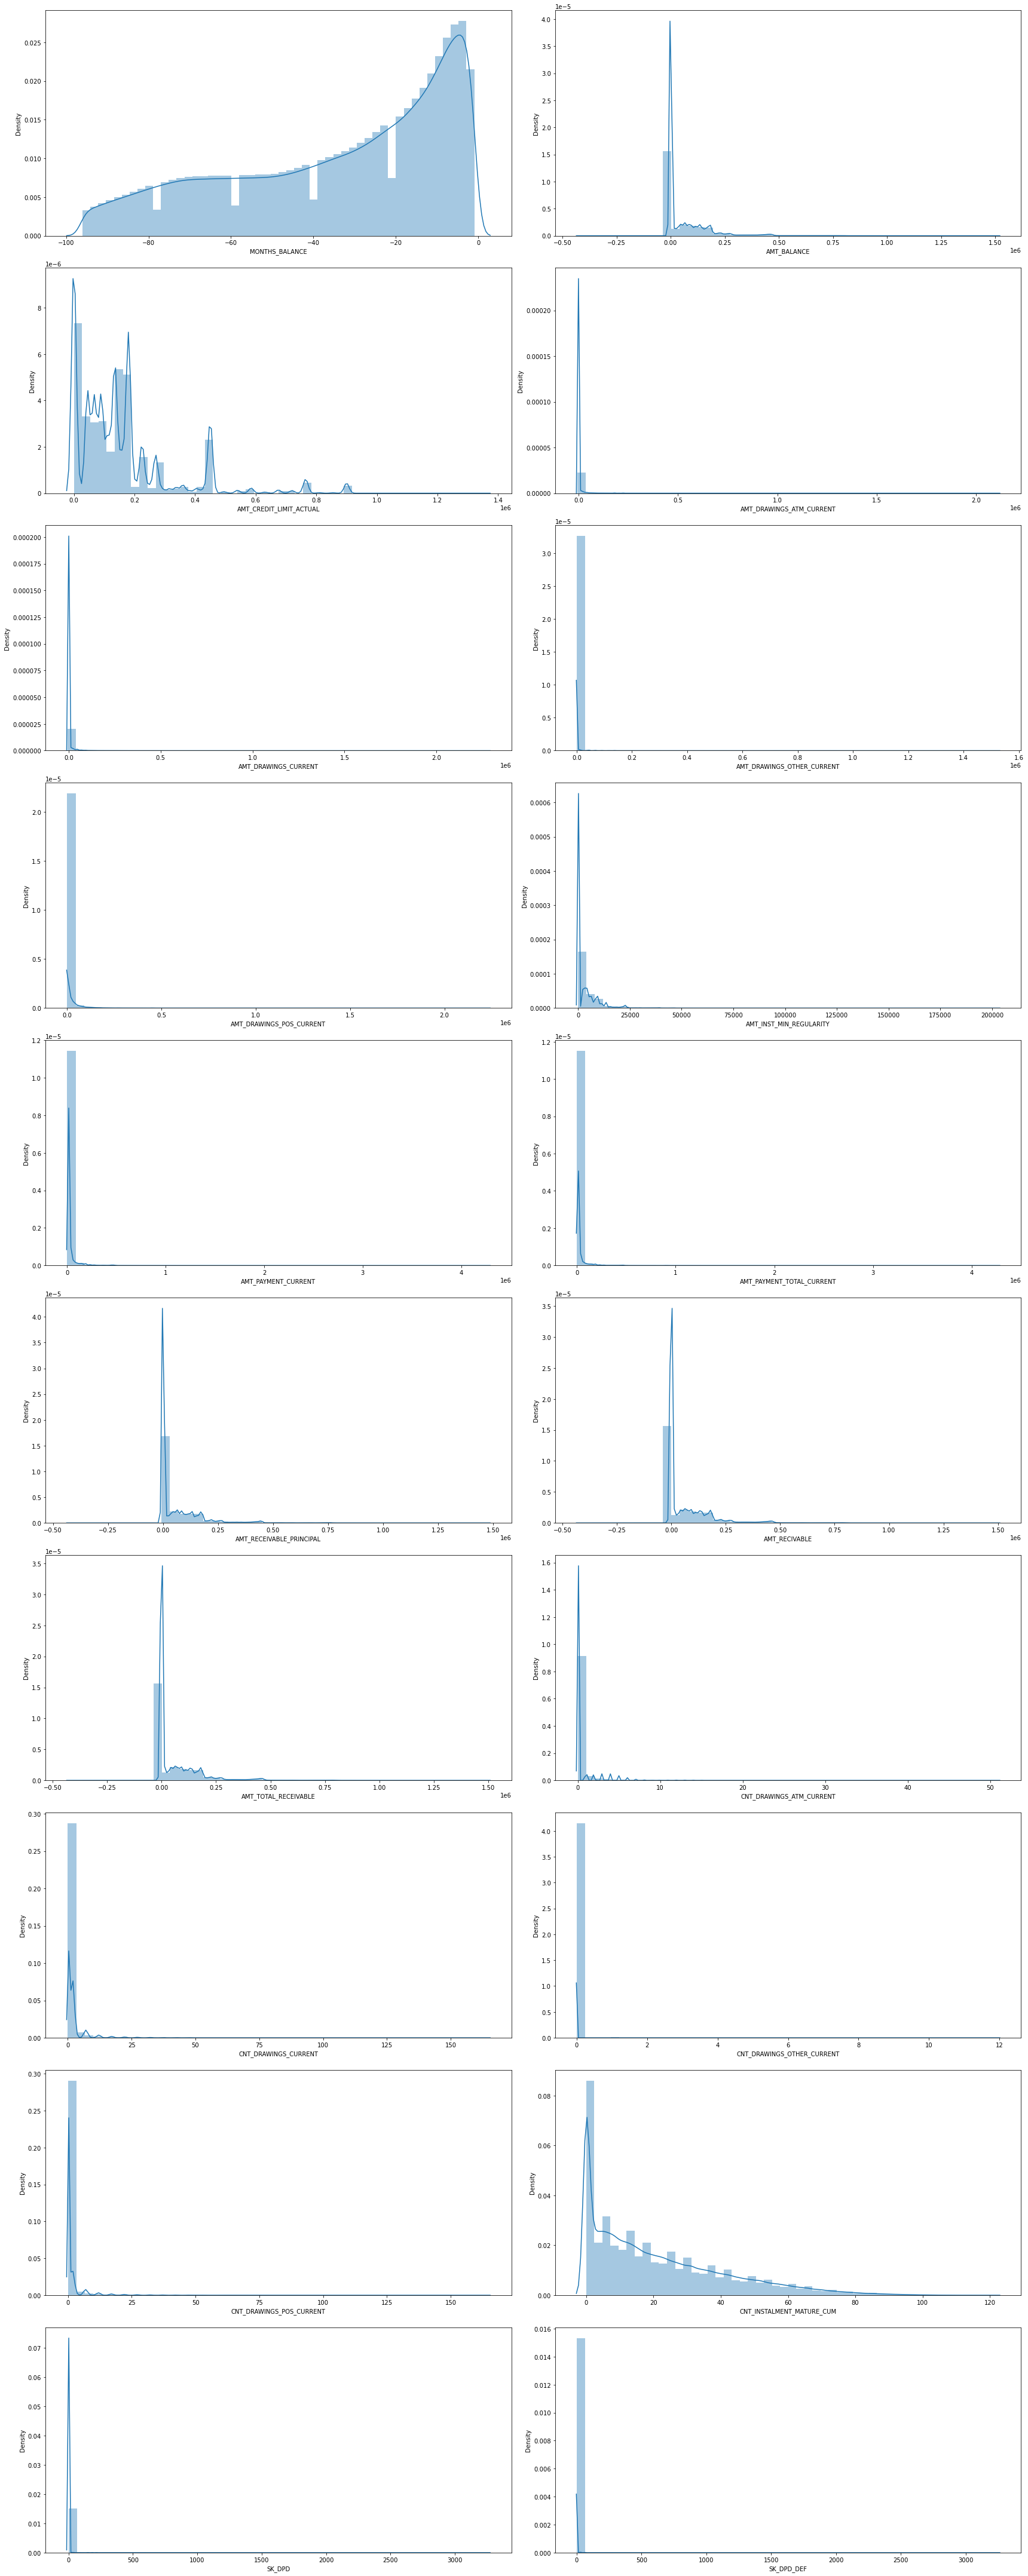

In [60]:
# Vislualize distribution of numeric data
card_balance_number = ['MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE',
       'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',
       'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',
       'CNT_INSTALMENT_MATURE_CUM', 'SK_DPD', 'SK_DPD_DEF']

fig,ax = plt.subplots(10,2, figsize=(24,60)) 
i=0 
for x in range(10):
    for y in range(2):
        sns.distplot(credit_card_balance[card_balance_number[i]], ax = ax[x,y])
        i+=1
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='count', ylabel='NAME_CONTRACT_STATUS'>

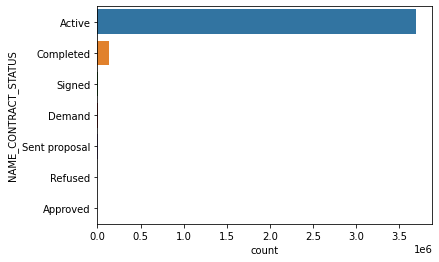

In [61]:
# Vislualize distribution of categorical data
sns.countplot(y='NAME_CONTRACT_STATUS', data=credit_card_balance, order=credit_card_balance['NAME_CONTRACT_STATUS'].value_counts().index)

### 4. installments_payments

In [62]:
installments_payments.describe([.01, .1, .25, .5, .75, .9, .99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
SK_ID_PREV,13605401.0,1.903365e+06,536202.905546,1000001.0,1011180.000,1176563.000,1434191.000,1896520.000,2369094.000,2652602.000,2.824545e+06,2843499.000
SK_ID_CURR,13605401.0,2.784449e+05,102718.310411,100001.0,103583.000,135870.000,189639.000,278685.000,367530.000,421540.000,4.528020e+05,456255.000
NUM_INSTALMENT_VERSION,13605401.0,8.566373e-01,1.035216,0.0,0.000,0.000,0.000,1.000,1.000,1.000,4.000000e+00,178.000
NUM_INSTALMENT_NUMBER,13605401.0,1.887090e+01,26.664067,1.0,1.000,2.000,4.000,8.000,19.000,56.000,1.210000e+02,277.000
DAYS_INSTALMENT,13605401.0,-1.042270e+03,800.946284,-2922.0,-2832.000,-2307.000,-1654.000,-818.000,-361.000,-150.000,-2.100000e+01,-1.000
DAYS_ENTRY_PAYMENT,13602496.0,-1.051114e+03,800.585883,-4921.0,-2837.000,-2316.000,-1662.000,-827.000,-370.000,-159.000,-2.800000e+01,-1.000
AMT_INSTALMENT,13605401.0,1.705091e+04,50570.254429,0.0,13.275,717.705,4226.085,8884.080,16710.210,31415.175,1.460687e+05,3771487.845
AMT_PAYMENT,13602496.0,1.723822e+04,54735.783981,0.0,3.780,331.830,3398.265,8125.515,16108.425,31179.915,1.780040e+05,3771487.845


In [63]:
installments_payments.describe().columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NUM_INSTALMENT_VERSION',
       'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT',
       'AMT_INSTALMENT', 'AMT_PAYMENT'],
      dtype='object')

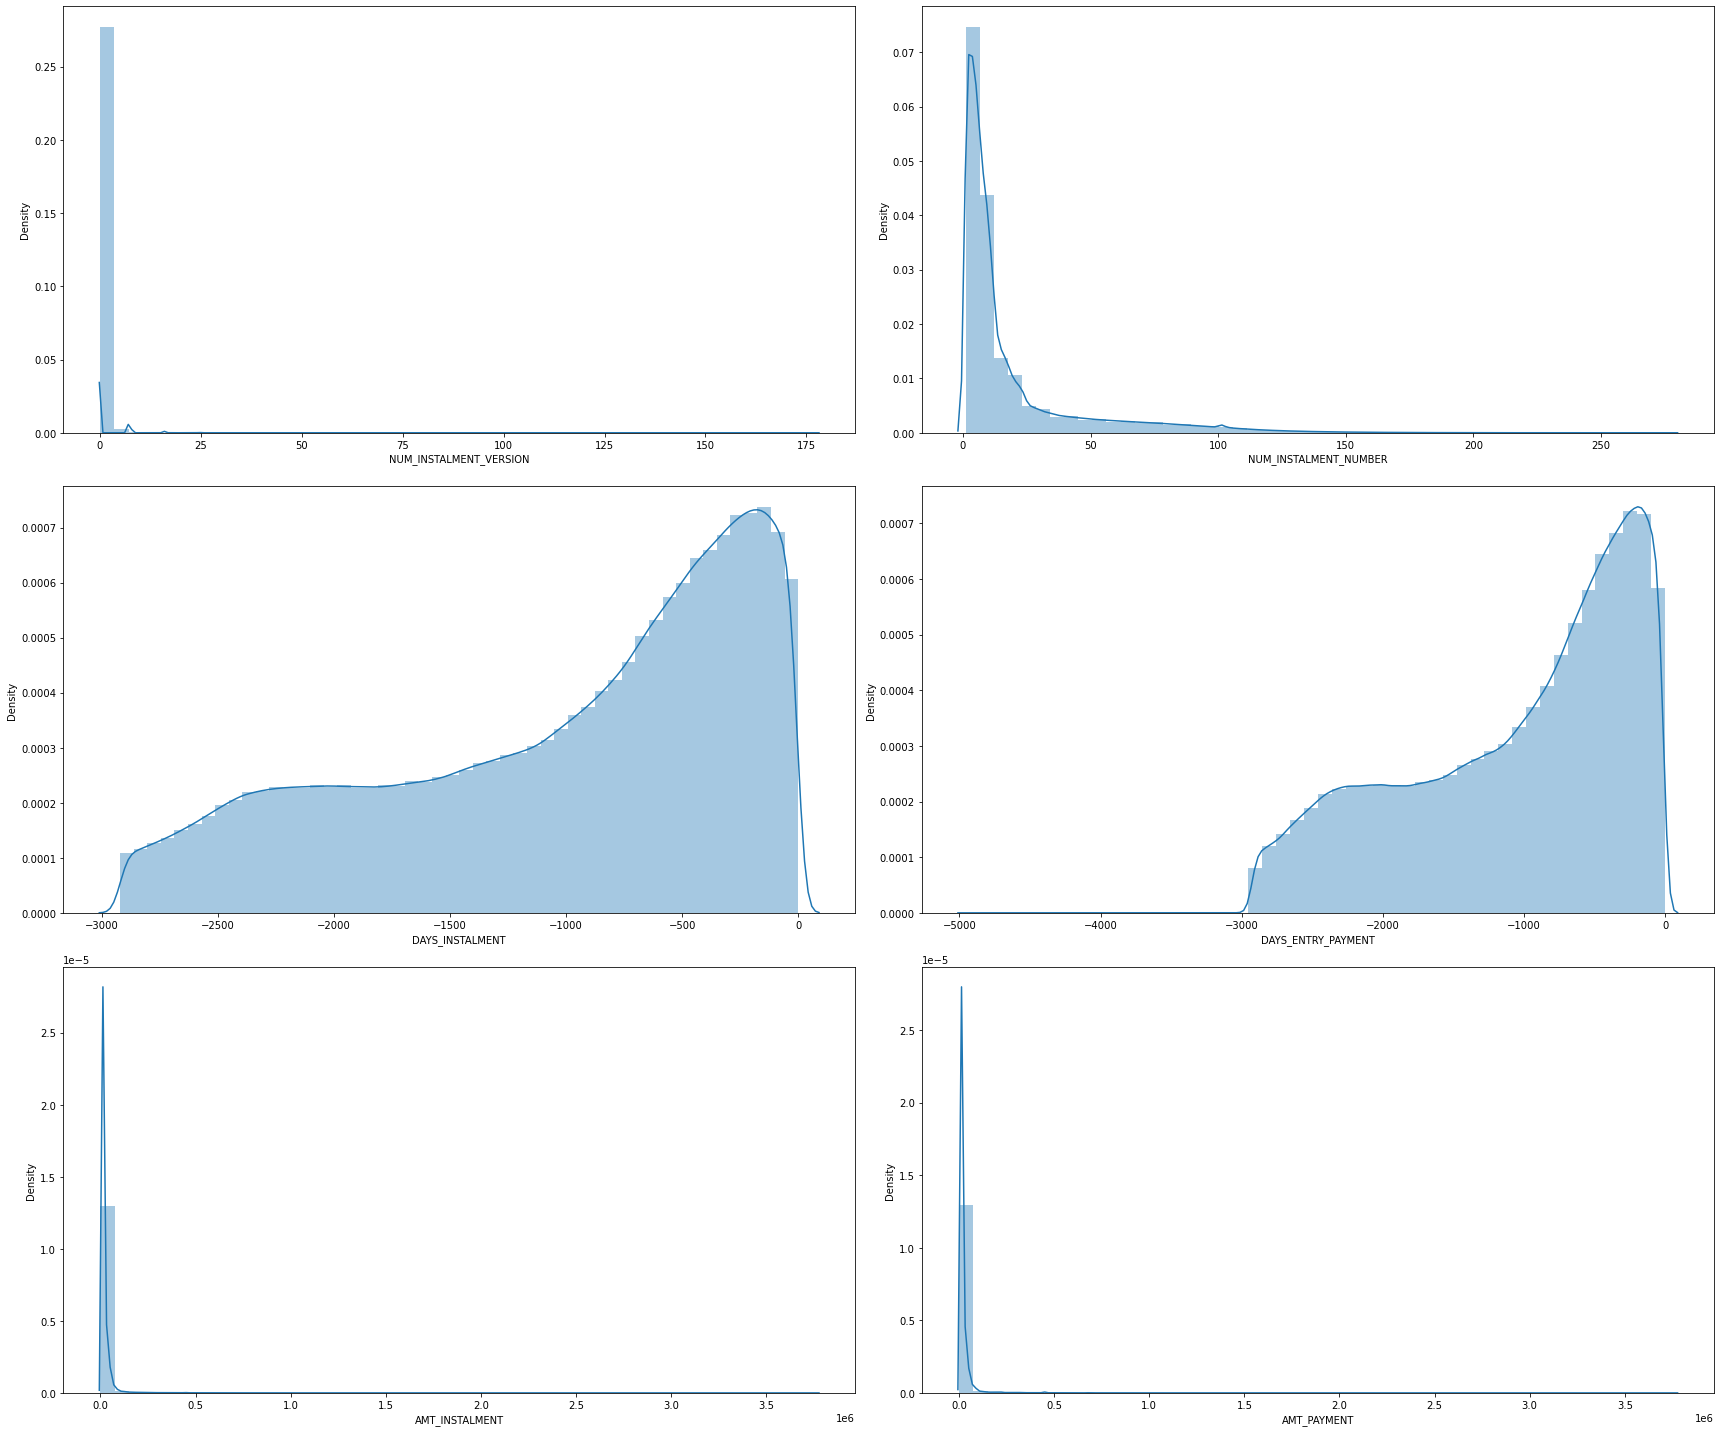

In [64]:
# Vislualize distribution of numeric data
installments_payments_num = ['NUM_INSTALMENT_VERSION',
       'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT',
       'AMT_INSTALMENT', 'AMT_PAYMENT']

fig,ax = plt.subplots(3,2, figsize=(24,20)) 
i=0 
for x in range(3):
    for y in range(2):
        sns.distplot(installments_payments[installments_payments_num[i]], ax = ax[x,y])
        i+=1
plt.tight_layout()
plt.show()

### 5. POS_CASH_balance

In [65]:
POS_CASH_balance.describe([.01, .1, .25, .5, .75, .9, .99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
SK_ID_PREV,10001358.0,1.903217e+06,535846.530722,1000001.0,1011901.0,1176905.0,1434405.0,1896565.0,2368963.0,2653031.0,2824223.0,2843499.0
SK_ID_CURR,10001358.0,2.784039e+05,102763.745090,100001.0,103540.0,135788.0,189550.0,278654.0,367429.0,421391.0,452772.0,456255.0
MONTHS_BALANCE,10001358.0,-3.501259e+01,26.066570,-96.0,-94.0,-77.0,-54.0,-28.0,-13.0,-6.0,-2.0,-1.0
CNT_INSTALMENT,9975287.0,1.708965e+01,11.995056,1.0,4.0,6.0,10.0,12.0,24.0,36.0,60.0,92.0
CNT_INSTALMENT_FUTURE,9975271.0,1.048384e+01,11.109058,0.0,0.0,0.0,3.0,7.0,14.0,24.0,53.0,85.0
SK_DPD,10001358.0,1.160693e+01,132.714043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,235.0,4231.0
SK_DPD_DEF,10001358.0,6.544684e-01,32.762491,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3595.0


In [66]:
POS_CASH_balance.describe(include = 'O')

,NAME_CONTRACT_STATUS
count,10001358
unique,9
top,Active
freq,9151119


In [67]:
POS_CASH_balance.describe().columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'CNT_INSTALMENT',
       'CNT_INSTALMENT_FUTURE', 'SK_DPD', 'SK_DPD_DEF'],
      dtype='object')

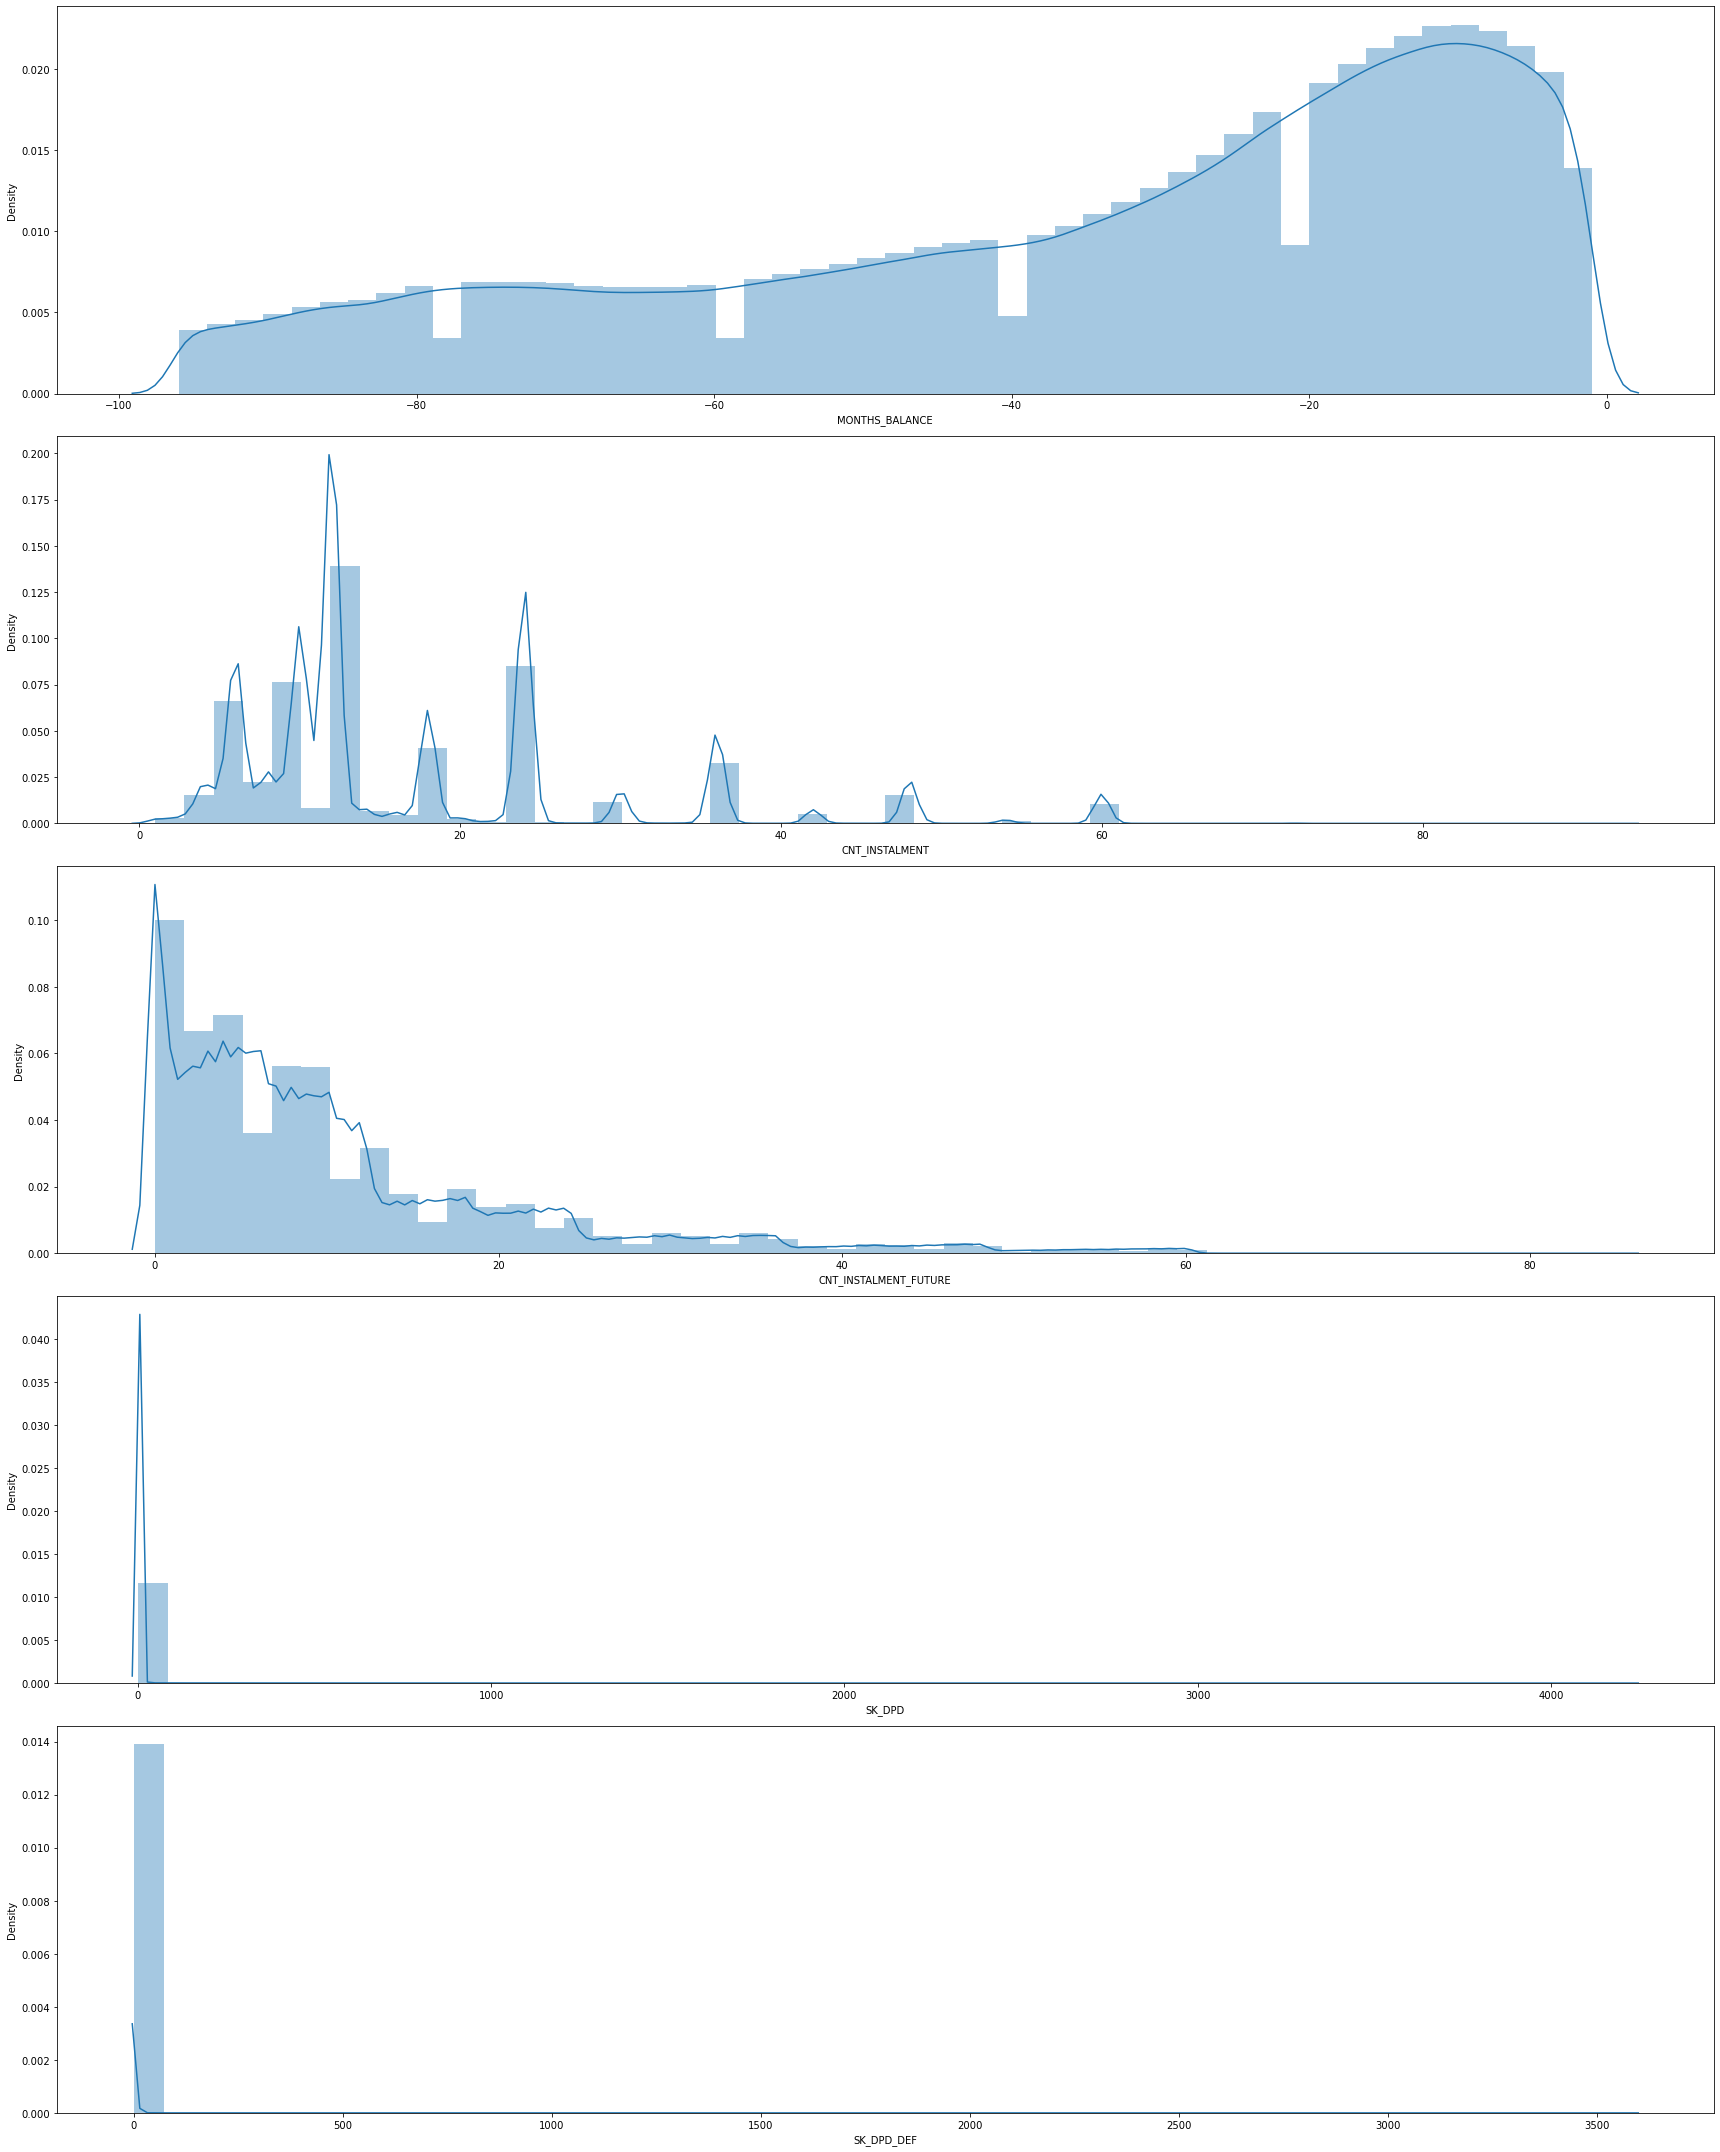

In [68]:
# Vislualize distribution of numeric data
POS_CASH_balance_num = ['MONTHS_BALANCE', 'CNT_INSTALMENT',
       'CNT_INSTALMENT_FUTURE', 'SK_DPD', 'SK_DPD_DEF']

fig,ax = plt.subplots(5,1, figsize=(24,30)) 
i=0 
for x in range(5):
    sns.distplot(POS_CASH_balance[POS_CASH_balance_num[i]], ax = ax[x])
    i+=1
plt.tight_layout()
plt.show()

### 6. previous_application

In [69]:
previous_application.describe([.01, .1, .25, .5, .75, .9, .99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
SK_ID_PREV,1670214.0,1.923089e+06,532597.958696,1.000001e+06,1.018566e+06,1.185033e+06,1.461857e+06,1.923110e+06,2.384280e+06,2.660865e+06,2.826907e+06,2845382.000
SK_ID_CURR,1670214.0,2.783572e+05,102814.823849,1.000010e+05,1.034940e+05,1.357380e+05,1.893290e+05,2.787145e+05,3.675140e+05,4.213590e+05,4.527850e+05,456255.000
AMT_ANNUITY,1297979.0,1.595512e+04,14782.137335,0.000000e+00,2.137175e+03,3.817530e+03,6.321780e+03,1.125000e+04,2.065842e+04,3.470382e+04,6.968579e+04,418058.145
AMT_APPLICATION,1670214.0,1.752339e+05,292779.762387,0.000000e+00,0.000000e+00,0.000000e+00,1.872000e+04,7.104600e+04,1.803600e+05,4.500000e+05,1.350000e+06,6905160.000
AMT_CREDIT,1670213.0,1.961140e+05,318574.616546,0.000000e+00,0.000000e+00,0.000000e+00,2.416050e+04,8.054100e+04,2.164185e+05,5.331600e+05,1.515378e+06,6905160.000
AMT_DOWN_PAYMENT,774370.0,6.697402e+03,20921.495410,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.638000e+03,7.740000e+03,1.710900e+04,6.593089e+04,3060045.000
AMT_GOODS_PRICE,1284699.0,2.278473e+05,315396.557937,0.000000e+00,1.530000e+04,3.055500e+04,5.084100e+04,1.123200e+05,2.340000e+05,5.850000e+05,1.395000e+06,6905160.000
HOUR_APPR_PROCESS_START,1670214.0,1.248418e+01,3.334028,0.000000e+00,5.000000e+00,8.000000e+00,1.000000e+01,1.200000e+01,1.500000e+01,1.700000e+01,2.000000e+01,23.000
NFLAG_LAST_APPL_IN_DAY,1670214.0,9.964675e-01,0.059330,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000
RATE_DOWN_PAYMENT,774370.0,7.963682e-02,0.107823,-1.497876e-05,0.000000e+00,0.000000e+00,0.000000e+00,5.160508e-02,1.089091e-01,2.119965e-01,5.210847e-01,1.000


In [70]:
previous_application.describe(include = 'O').T

,count,unique,top,freq
NAME_CONTRACT_TYPE,1670214,4,Cash loans,747553
WEEKDAY_APPR_PROCESS_START,1670214,7,TUESDAY,255118
FLAG_LAST_APPL_PER_CONTRACT,1670214,2,Y,1661739
NAME_CASH_LOAN_PURPOSE,1670214,25,XAP,922661
NAME_CONTRACT_STATUS,1670214,4,Approved,1036781
NAME_PAYMENT_TYPE,1670214,4,Cash through the bank,1033552
CODE_REJECT_REASON,1670214,9,XAP,1353093
NAME_TYPE_SUITE,849809,7,Unaccompanied,508970
NAME_CLIENT_TYPE,1670214,4,Repeater,1231261
NAME_GOODS_CATEGORY,1670214,28,XNA,950809


In [71]:
previous_application.describe().columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'DAYS_DECISION', 'SELLERPLACE_AREA',
       'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

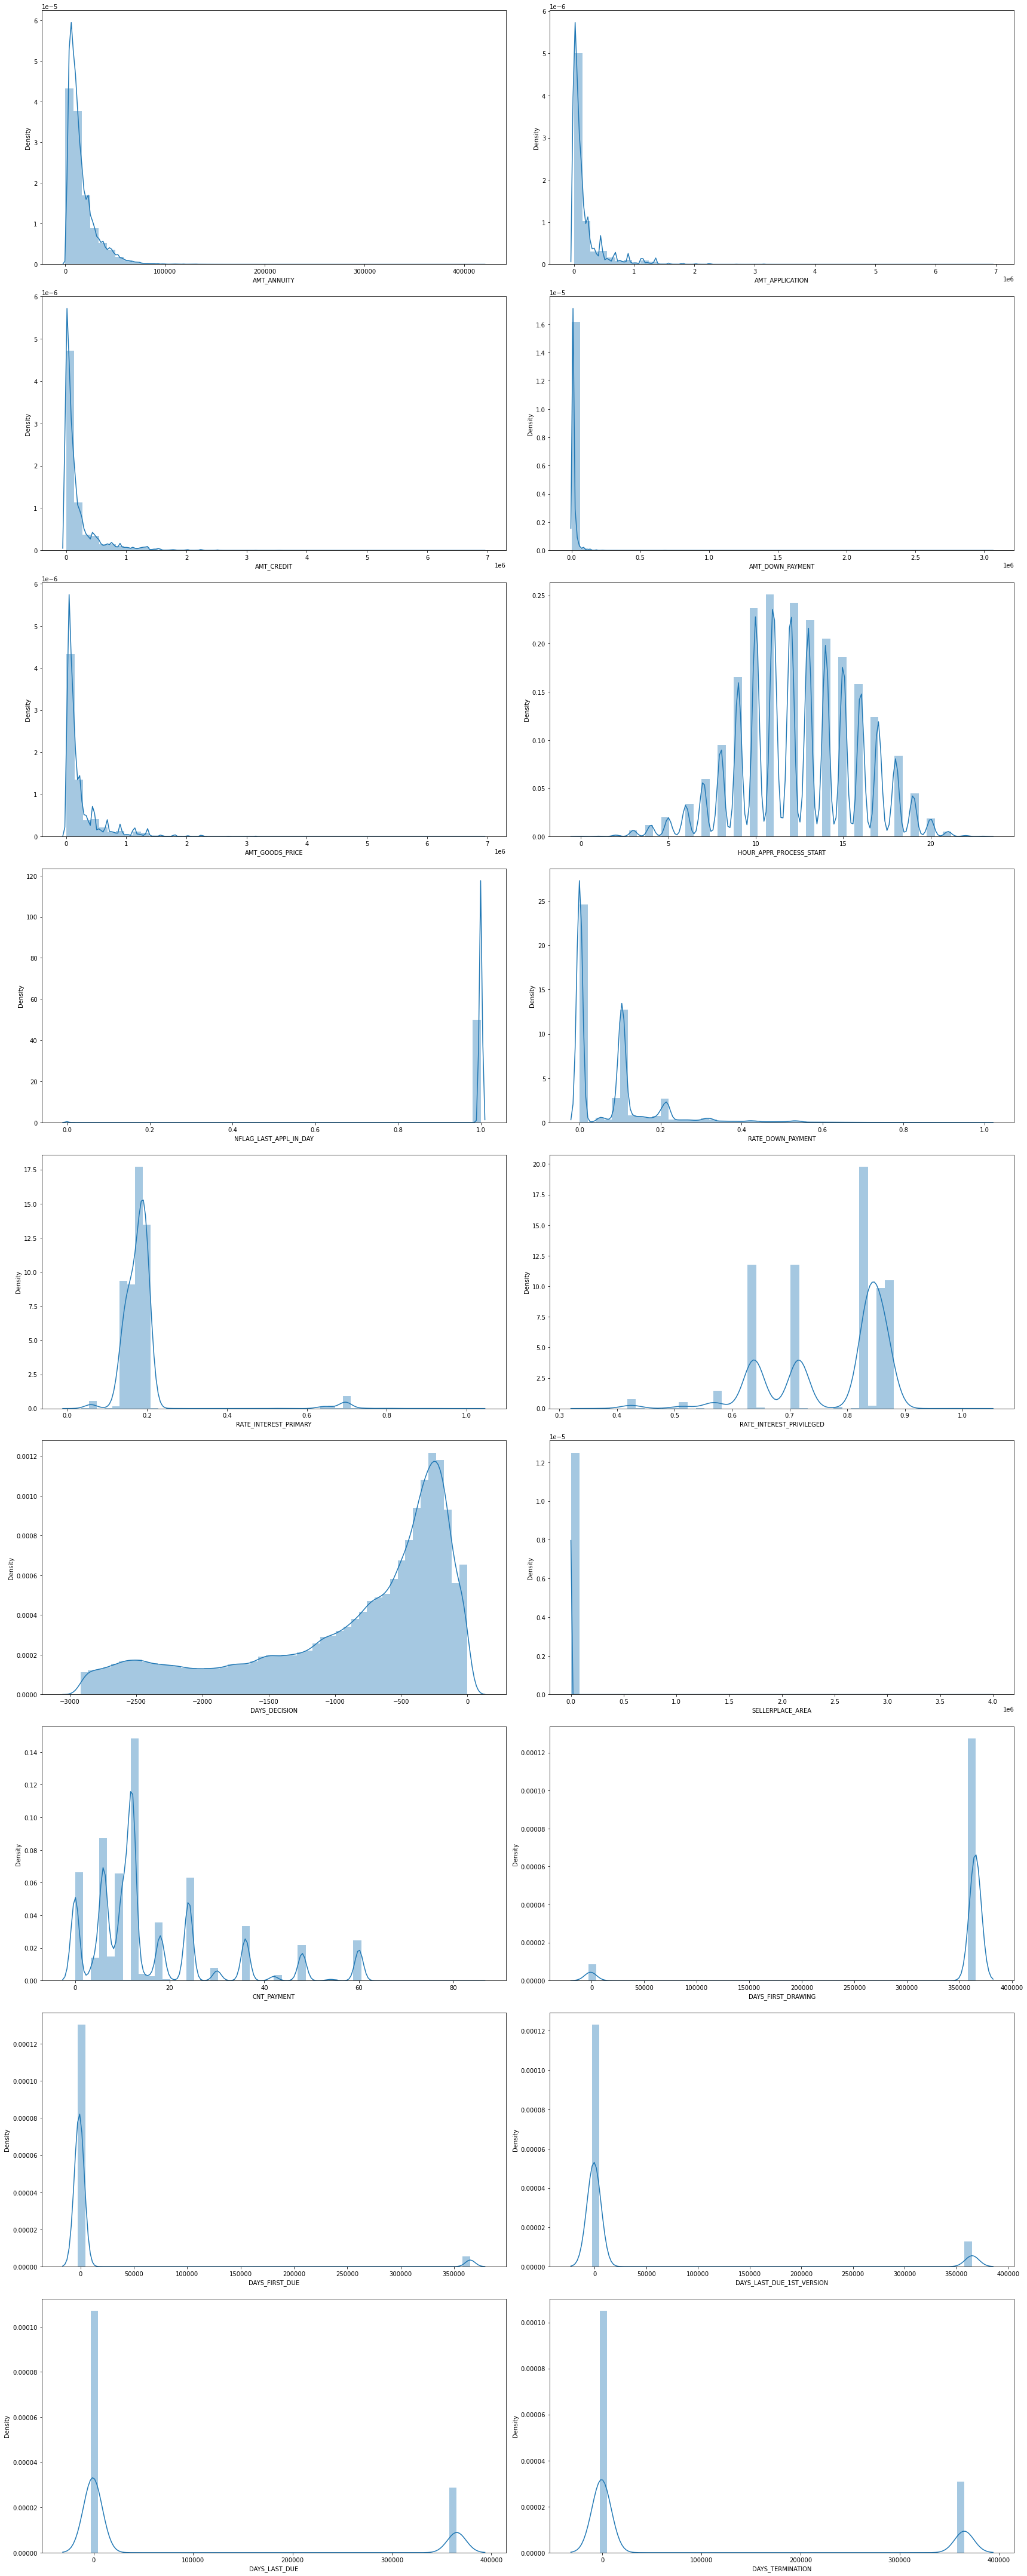

In [74]:
# Vislualize distribution of numeric data
previous_application_num = ['AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'DAYS_DECISION', 'SELLERPLACE_AREA',
       'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION']

fig,ax = plt.subplots(9,2, figsize=(24,60)) 
i=0 
for x in range(9):
    for y in range(2):
        sns.distplot(previous_application[previous_application_num[i]], ax = ax[x,y])
        i+=1
plt.tight_layout()
plt.show()

<AxesSubplot:ylabel='Density'>

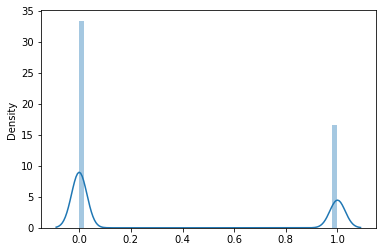

In [76]:
 sns.distplot(x = previous_application['NFLAG_INSURED_ON_APPROVAL'])

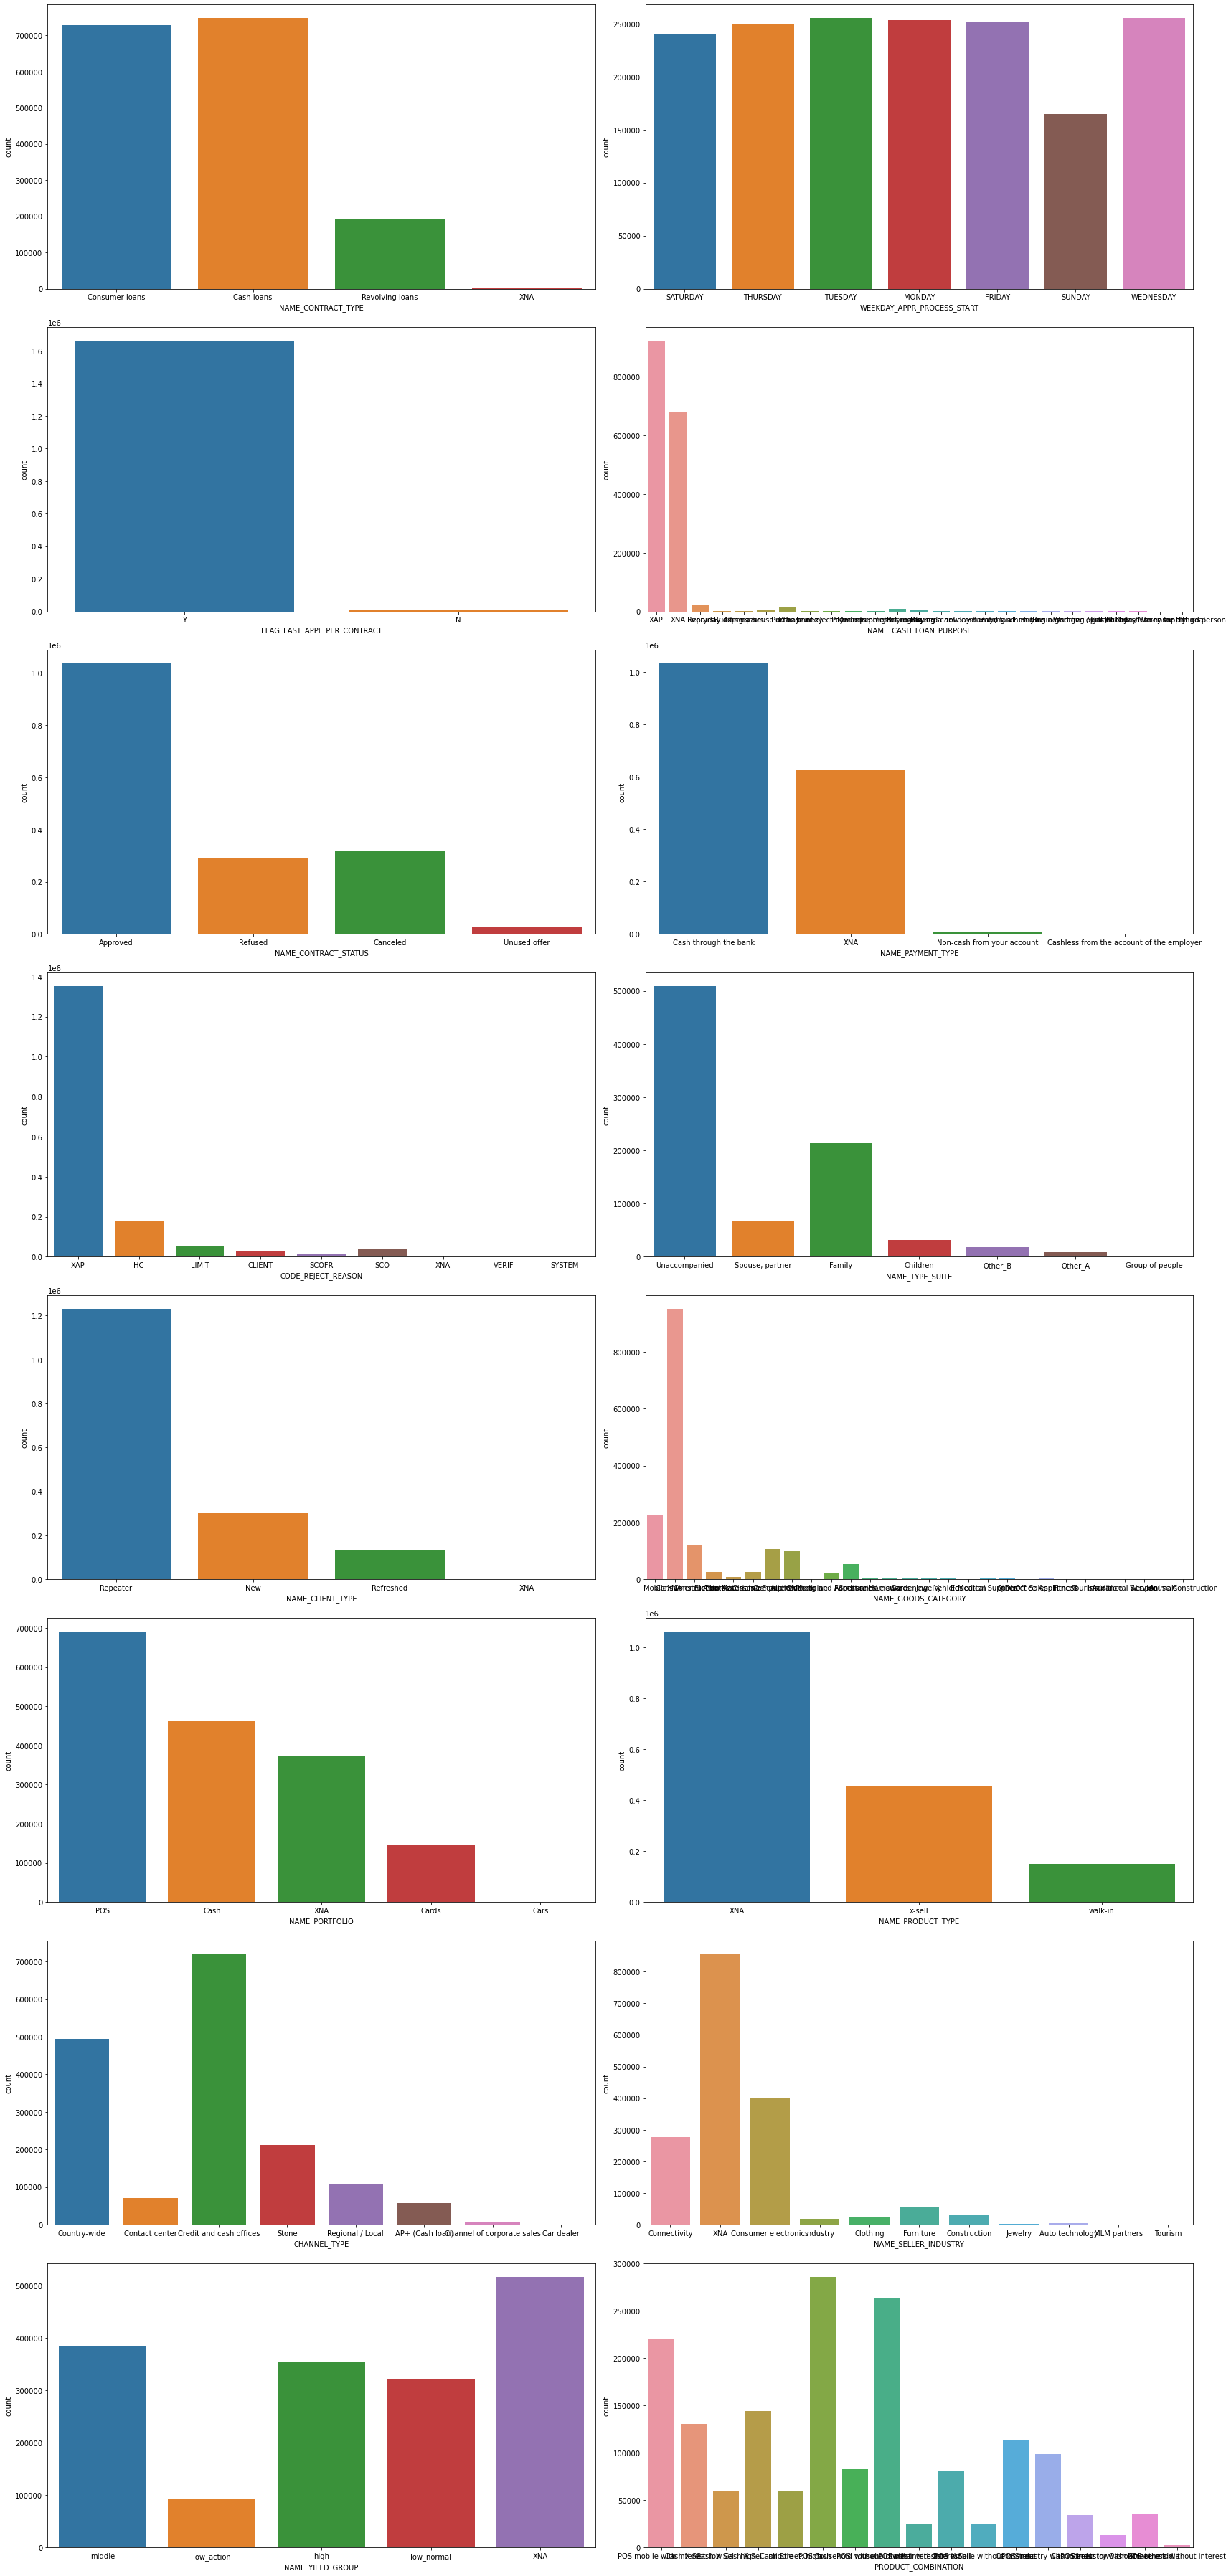

In [77]:
# Vislualize distribution of categorical data
previous_application_cat = previous_application.describe(include='O').columns

fig,ax = plt.subplots(8,2, figsize=(24,50)) 
i=0 
for x in range(8):
    for y in range(2):
        sns.countplot(previous_application[previous_application_cat[i]], ax = ax[x,y])
        i+=1
plt.tight_layout()
plt.show()

### Train set

In [78]:
ap_train.describe([.01, .1, .25, .5, .75, .9, .99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,100002.0,103590.2,135692.0,189145.5,278202.0,367142.5,420729.0,452712.9,456255.0
TARGET,307511.0,0.080729,0.272419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
CNT_CHILDREN,307511.0,0.417052,0.722121,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,19.0
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,25650.0,45000.0,81000.0,112500.0,147150.0,202500.0,270000.0,472500.0,117000000.0
AMT_CREDIT,307511.0,599025.999706,402490.776996,45000.0,76410.0,180000.0,270000.0,513531.0,808650.0,1133748.0,1854000.0,4050000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,265992.0,0.007000,0.110757,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
AMT_REQ_CREDIT_BUREAU_WEEK,265992.0,0.034362,0.204685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0
AMT_REQ_CREDIT_BUREAU_MON,265992.0,0.267395,0.916002,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,27.0
AMT_REQ_CREDIT_BUREAU_QRT,265992.0,0.265474,0.794056,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,261.0


In [79]:
ap_train.describe(include = 'O').T

,count,unique,top,freq
NAME_CONTRACT_TYPE,307511,2,Cash loans,278232
CODE_GENDER,307511,3,F,202448
FLAG_OWN_CAR,307511,2,N,202924
FLAG_OWN_REALTY,307511,2,Y,213312
NAME_TYPE_SUITE,306219,7,Unaccompanied,248526
NAME_INCOME_TYPE,307511,8,Working,158774
NAME_EDUCATION_TYPE,307511,5,Secondary / secondary special,218391
NAME_FAMILY_STATUS,307511,6,Married,196432
NAME_HOUSING_TYPE,307511,6,House / apartment,272868
OCCUPATION_TYPE,211120,18,Laborers,55186


In [86]:
train_num = ap_train.describe().columns
train_cat = ap_train.describe(include ='O').columns

In [111]:
ap_train[train_num].iloc[:,0:50].describe([.01, .1, .25, .5, .75, .9, .99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,1.000020e+05,103590.200000,135692.000000,189145.500000,278202.000000,367142.500000,4.207290e+05,4.527129e+05,4.562550e+05
TARGET,307511.0,0.080729,0.272419,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00,1.000000e+00
CNT_CHILDREN,307511.0,0.417052,0.722121,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000e+00,3.000000e+00,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,2.565000e+04,45000.000000,81000.000000,112500.000000,147150.000000,202500.000000,2.700000e+05,4.725000e+05,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,4.500000e+04,76410.000000,180000.000000,270000.000000,513531.000000,808650.000000,1.133748e+06,1.854000e+06,4.050000e+06
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1.615500e+03,6182.910000,11074.500000,16524.000000,24903.000000,34596.000000,4.595400e+04,7.000650e+04,2.580255e+05
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,4.050000e+04,67500.000000,180000.000000,238500.000000,450000.000000,679500.000000,1.093500e+06,1.800000e+06,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,2.900000e-04,0.002134,0.006629,0.010006,0.018850,0.028663,3.579200e-02,7.250800e-02,7.250800e-02
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-2.522900e+04,-24419.000000,-22181.000000,-19682.000000,-15750.000000,-12413.000000,-1.028400e+04,-8.263000e+03,-7.489000e+03
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-1.791200e+04,-10894.900000,-4881.000000,-2760.000000,-1213.000000,-289.000000,3.652430e+05,3.652430e+05,3.652430e+05


In [112]:
ap_train[train_num].iloc[:,51:].describe([.01, .1, .25, .5, .75, .9, .99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
ELEVATORS_MODE,143620.0,0.074490,0.132256,0.0,0.0000,0.0000,0.0000,0.0000,0.1208,0.24170,0.604200,1.0
ENTRANCES_MODE,152683.0,0.145193,0.100977,0.0,0.0345,0.0345,0.0690,0.1379,0.2069,0.27590,0.517200,1.0
FLOORSMAX_MODE,154491.0,0.222315,0.143709,0.0,0.0000,0.0417,0.1667,0.1667,0.3333,0.37500,0.666700,1.0
FLOORSMIN_MODE,98869.0,0.228058,0.161160,0.0,0.0000,0.0417,0.0833,0.2083,0.3750,0.41670,0.708300,1.0
LANDAREA_MODE,124921.0,0.064958,0.081750,0.0,0.0000,0.0000,0.0166,0.0458,0.0841,0.14090,0.378880,1.0
LIVINGAPARTMENTS_MODE,97312.0,0.105645,0.097880,0.0,0.0028,0.0202,0.0542,0.0771,0.1313,0.21670,0.488500,1.0
LIVINGAREA_MODE,153161.0,0.105975,0.111845,0.0,0.0019,0.0134,0.0427,0.0731,0.1252,0.23360,0.561640,1.0
NONLIVINGAPARTMENTS_MODE,93997.0,0.008076,0.046276,0.0,0.0000,0.0000,0.0000,0.0000,0.0039,0.01560,0.097300,1.0
NONLIVINGAREA_MODE,137829.0,0.027022,0.070254,0.0,0.0000,0.0000,0.0000,0.0011,0.0231,0.07880,0.322100,1.0
APARTMENTS_MEDI,151450.0,0.117850,0.109076,0.0,0.0021,0.0167,0.0583,0.0864,0.1489,0.24200,0.550110,1.0


In [114]:
ap_train[train_cat].describe().T

,count,unique,top,freq
NAME_CONTRACT_TYPE,307511,2,Cash loans,278232
CODE_GENDER,307511,3,F,202448
FLAG_OWN_CAR,307511,2,N,202924
FLAG_OWN_REALTY,307511,2,Y,213312
NAME_TYPE_SUITE,306219,7,Unaccompanied,248526
NAME_INCOME_TYPE,307511,8,Working,158774
NAME_EDUCATION_TYPE,307511,5,Secondary / secondary special,218391
NAME_FAMILY_STATUS,307511,6,Married,196432
NAME_HOUSING_TYPE,307511,6,House / apartment,272868
OCCUPATION_TYPE,211120,18,Laborers,55186


## Handle missing values

In [83]:
ap_train.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [84]:
ap_train['TARGET'].isnull().sum()

0

In [99]:
print(max(ap_train[train_num].isnull().sum()/len(ap_train[train_num])))

0.6987229725115525


In [115]:
print(round(ap_train[train_cat].isnull().sum()/len(ap_train[train_cat])*100,2))

NAME_CONTRACT_TYPE             0.00
CODE_GENDER                    0.00
FLAG_OWN_CAR                   0.00
FLAG_OWN_REALTY                0.00
NAME_TYPE_SUITE                0.42
NAME_INCOME_TYPE               0.00
NAME_EDUCATION_TYPE            0.00
NAME_FAMILY_STATUS             0.00
NAME_HOUSING_TYPE              0.00
OCCUPATION_TYPE               31.35
WEEKDAY_APPR_PROCESS_START     0.00
ORGANIZATION_TYPE              0.00
FONDKAPREMONT_MODE            68.39
HOUSETYPE_MODE                50.18
WALLSMATERIAL_MODE            50.84
EMERGENCYSTATE_MODE           47.40
dtype: float64


In [107]:
print(round(ap_train[train_num].iloc[:,0:50].isnull().sum()/len(ap_train)*100,2))

SK_ID_CURR                       0.00
TARGET                           0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE                       0.00
FLAG_EMAIL                       0.00
CNT_FAM_MEMBERS                  0.00
REGION_RATING_CLIENT             0.00
REGION_RATING_CLIENT_W_CITY      0.00
HOUR_APPR_PROCESS_START          0.00
REG_REGION_NOT_LIVE_REGION       0.00
REG_REGION_NOT_WORK_REGION       0.00
LIVE_REGION_NOT_WORK_REGION      0.00
REG_CITY_NOT

In [108]:
print(round(ap_train[train_num].iloc[:,51:].isnull().sum()/len(ap_train)*100,2))

ELEVATORS_MODE                  53.30
ENTRANCES_MODE                  50.35
FLOORSMAX_MODE                  49.76
FLOORSMIN_MODE                  67.85
LANDAREA_MODE                   59.38
LIVINGAPARTMENTS_MODE           68.35
LIVINGAREA_MODE                 50.19
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAREA_MODE              55.18
APARTMENTS_MEDI                 50.75
BASEMENTAREA_MEDI               58.52
YEARS_BEGINEXPLUATATION_MEDI    48.78
YEARS_BUILD_MEDI                66.50
COMMONAREA_MEDI                 69.87
ELEVATORS_MEDI                  53.30
ENTRANCES_MEDI                  50.35
FLOORSMAX_MEDI                  49.76
FLOORSMIN_MEDI                  67.85
LANDAREA_MEDI                   59.38
LIVINGAPARTMENTS_MEDI           68.35
LIVINGAREA_MEDI                 50.19
NONLIVINGAPARTMENTS_MEDI        69.43
NONLIVINGAREA_MEDI              55.18
TOTALAREA_MODE                  48.27
OBS_30_CNT_SOCIAL_CIRCLE         0.33
DEF_30_CNT_SOCIAL_CIRCLE         0.33
OBS_60_CNT_S

In [110]:
# Check if duplicated values
ap_train.duplicated().sum()

0